In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

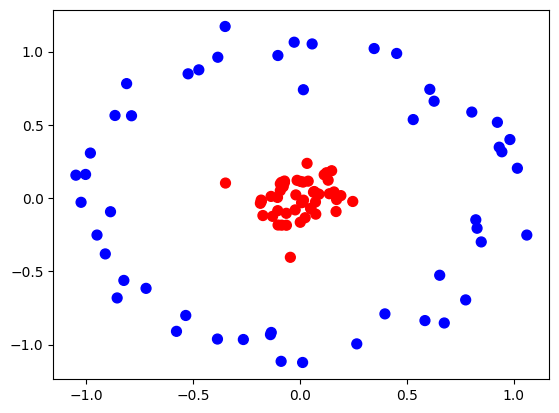

In [5]:
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [9]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.45

In [11]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\Sanjana Uprety\AppData\Local\Temp\ipykernel_14552\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


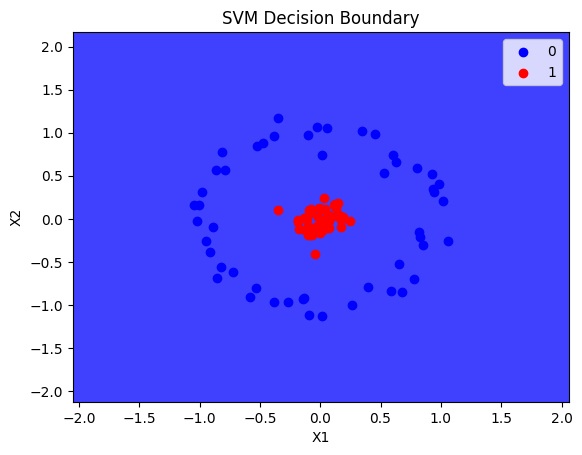

In [12]:
plot_decision_boundary(X, y, classifier)


In [13]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

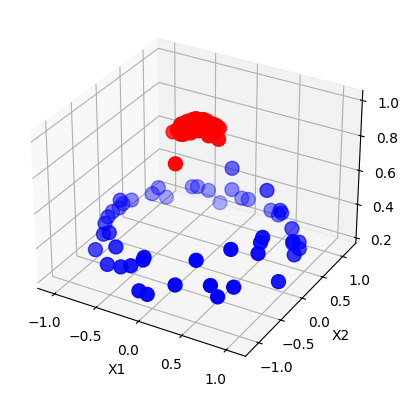

In [14]:
plot_3d_plot(X,y)


In [15]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\Sanjana Uprety\AppData\Local\Temp\ipykernel_14552\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


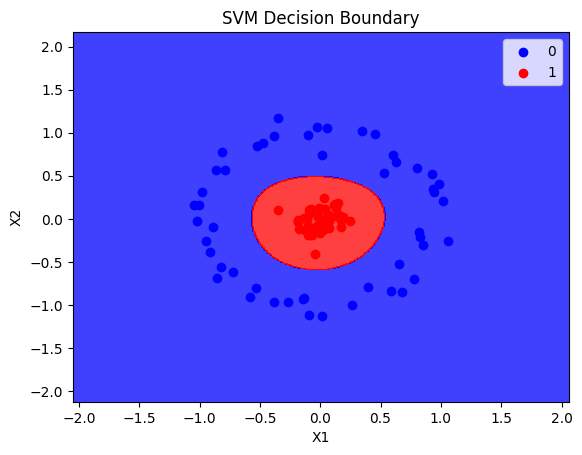

In [17]:
plot_decision_boundary(X, y, rbf_classifier)

In [18]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred)


1.0

C:\Users\Sanjana Uprety\AppData\Local\Temp\ipykernel_14552\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


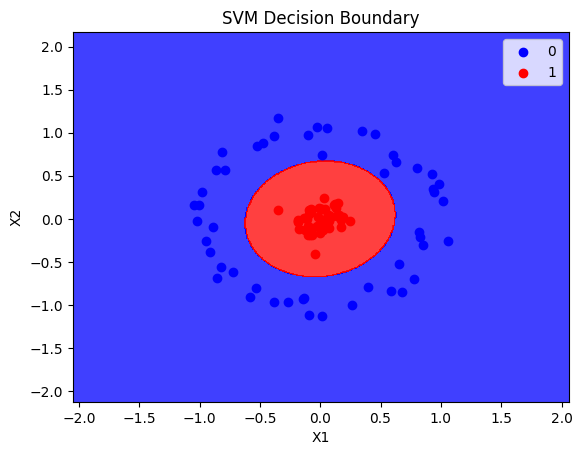

In [20]:
plot_decision_boundary(X, y, poly_classifier)


In [21]:
X

array([[ 9.44276758e-01,  3.15493616e-01],
       [ 5.63200941e-02,  1.05176388e+00],
       [-7.88977509e-01,  5.61496247e-01],
       [-3.86844024e-01, -9.62692976e-01],
       [-1.02511468e+00, -2.93171391e-02],
       [-2.65644052e-01, -9.65903422e-01],
       [-8.24883230e-01, -5.62585912e-01],
       [-1.85915665e-01, -3.62284871e-02],
       [ 1.06090240e+00, -2.52874346e-01],
       [ 9.81894946e-01,  3.99025025e-01],
       [ 2.46387659e-01, -2.36137960e-02],
       [-1.82334933e-01, -1.43150527e-02],
       [ 6.53293534e-01, -5.27300016e-01],
       [ 5.29343606e-01,  5.35437495e-01],
       [ 6.74640881e-01, -8.53116787e-01],
       [-4.56217259e-02, -4.04798791e-01],
       [ 2.35450675e-02, -1.34594340e-01],
       [-8.77980718e-02,  1.06843311e-01],
       [-1.04678517e-01, -8.63530491e-02],
       [ 8.81753551e-02,  2.58778295e-02],
       [-4.73963115e-01,  8.74914779e-01],
       [-5.35169044e-01, -8.01747187e-01],
       [ 8.03535719e-01,  5.86637693e-01],
       [ 7.

In [22]:
np.exp(-(X**2)).sum(1)

array([1.31523236, 1.32764434, 1.26619503, 1.25683785, 1.34877777,
       1.32524938, 1.2350909 , 1.96471426, 1.26254185, 1.23412739,
       1.9405416 , 1.96709565, 1.4098615 , 1.50637102, 1.11732532,
       1.84677993, 1.98149325, 1.98097055, 1.98167311, 1.99158582,
       1.26391546, 1.27677657, 1.23313832, 1.16512922, 1.96252312,
       1.34321346, 1.99906651, 1.98884946, 1.96401354, 1.20016983,
       1.98365257, 1.32103514, 1.48675004, 1.96715169, 1.98134426,
       1.19297999, 1.13803855, 1.9679873 , 1.30851915, 1.99291999,
       1.44633059, 1.95882411, 1.2834053 , 1.32190157, 1.98734063,
       1.2073575 , 1.98057462, 1.24719976, 1.38918577, 1.19208119,
       1.98259008, 1.2783169 , 1.57876776, 1.98154164, 1.98808679,
       1.99279493, 1.25933945, 1.99452837, 1.30625543, 1.28068069,
       1.31520532, 1.9619293 , 1.94437141, 1.29177376, 1.9854332 ,
       1.95590544, 1.23992965, 1.268626  , 1.97115449, 1.99915662,
       1.95558574, 1.98499305, 1.40008183, 1.99258199, 1.06074

In [24]:
X_new=np.exp(-(X**2))

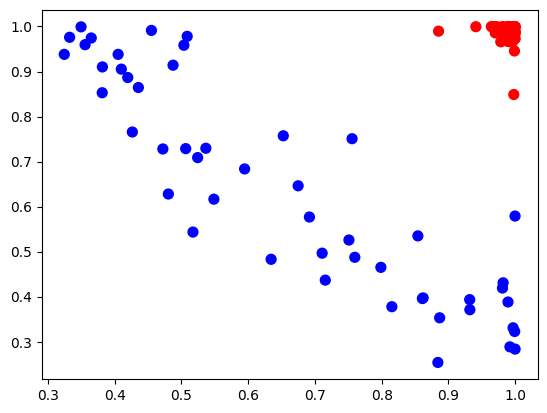

In [25]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')